<a href="https://colab.research.google.com/github/kilaspintas/ai_project/blob/master/neural_network/convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Download dataset
!wget --no-check-certificate \
    https://github.com/kilaspintas/ai_project/raw/master/Dataset-Kemangi%20dan%20Jambu%20Biji_139_128/Dataset-Kemangi%20dan%20Jambu%20Biji_139_128.zip \
    -O /tmp/kemangi_dan_jambuBiji.zip

--2022-11-09 14:59:03--  https://github.com/kilaspintas/ai_project/raw/master/Dataset-Kemangi%20dan%20Jambu%20Biji_139_128/Dataset-Kemangi%20dan%20Jambu%20Biji_139_128.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kilaspintas/ai_project/master/Dataset-Kemangi%20dan%20Jambu%20Biji_139_128/Dataset-Kemangi%20dan%20Jambu%20Biji_139_128.zip [following]
--2022-11-09 14:59:03--  https://raw.githubusercontent.com/kilaspintas/ai_project/master/Dataset-Kemangi%20dan%20Jambu%20Biji_139_128/Dataset-Kemangi%20dan%20Jambu%20Biji_139_128.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40446413 (39M) 

In [12]:
# Ekstrak dataset

import os
import zipfile

local_zip = '/tmp/kemangi_dan_jambuBiji.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [13]:
# Definisikan path untuk data train dan data validation

base_dir = '/tmp/Dataset-Kemangi dan Jambu Biji_139_128/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [14]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)
print(train_label)

['jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji'
 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji'
 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji'
 'jambuBiji' 'jambuBiji' 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi'
 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi'
 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi'
 'kemangi']


In [15]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

<h3>Data Preprocessing</h3>

In [16]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (40, 150, 150, 3)
Train Label =  (40,)
Validation Data =  (60, 150, 150, 3)
Validation Label =  (60,)


In [17]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [242 221 229]
Data setelah di-normalisasi  [0.9490196 0.8666667 0.8980392]


In [49]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[0:40])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[0:40])

Label sebelum di-encoder  ['jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji'
 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji'
 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji' 'jambuBiji'
 'jambuBiji' 'jambuBiji' 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi'
 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi'
 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi' 'kemangi'
 'kemangi']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


<h3>Definisikan Model</h3>

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten

In [51]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [52]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [53]:
# Print model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 19, 19, 64)      

In [54]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

<h3>Training Model</h3>

In [55]:
H = model.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
2/2 [==============================] - 2s 990ms/step - loss: 0.9404 - acc: 0.5250 - val_loss: 0.5756 - val_acc: 1.0000
Epoch 2/15
2/2 [==============================] - 1s 850ms/step - loss: 0.6594 - acc: 0.7250 - val_loss: 0.6331 - val_acc: 0.5000
Epoch 3/15
2/2 [==============================] - 1s 832ms/step - loss: 0.5821 - acc: 0.7750 - val_loss: 0.4999 - val_acc: 0.7000
Epoch 4/15
2/2 [==============================] - 1s 844ms/step - loss: 0.4826 - acc: 0.7000 - val_loss: 0.4222 - val_acc: 0.6833
Epoch 5/15
2/2 [==============================] - 1s 836ms/step - loss: 0.3550 - acc: 0.8750 - val_loss: 0.2441 - val_acc: 1.0000
Epoch 6/15
2/2 [==============================] - 1s 854ms/step - loss: 0.2003 - acc: 1.0000 - val_loss: 0.1274 - val_acc: 1.0000
Epoch 7/15
2/2 [==============================] - 1s 844ms/step - loss: 0.0986 - acc: 1.0000 - val_loss: 0.0496 - val_acc: 1.0000
Epoch 8/15
2/2 [==============================] - 1s 834ms/step - loss: 0.0312 - acc: 1.00

<h3>Evaluasi Model</h3>

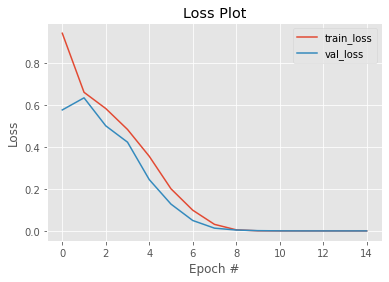

In [56]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

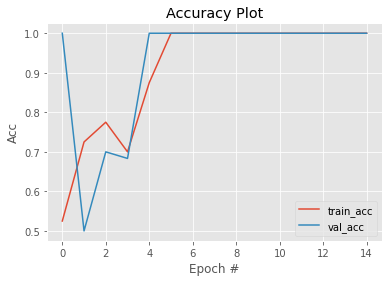

In [57]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(int)

print(classification_report(y_val, labels))

2/2 [==============================] - 0s 175ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

